# Analiza wykresu cen akcji CDProjekt wraz z wykorzystaniem analizy technicznej

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sympy
import random
from matplotlib import image
import math
import plotly.graph_objects as go
from datetime import datetime
import statistics as st
from datetime import date

Pobieranie danych od stycznia 2020 do dnia dzisiejszego z Stooq

In [2]:
today = datetime.today()
year = today.strftime("%Y")
day = today.strftime("%d")
month = today.strftime("%m")

year1 = "2019"
day1 = "10"
month1 = "11"
file_path = "https://stooq.pl/q/d/l/?s=cdr&d1="+year1+month1+day1+"&d2="+year+month+day+"&i=d"       

Zmiana kolumny data na typ daty

In [3]:
dane_CD = pd.read_csv(file_path)
dane_CD['Data']= pd.to_datetime(dane_CD['Data'])  

Wykres cen akcji CDProjekt 

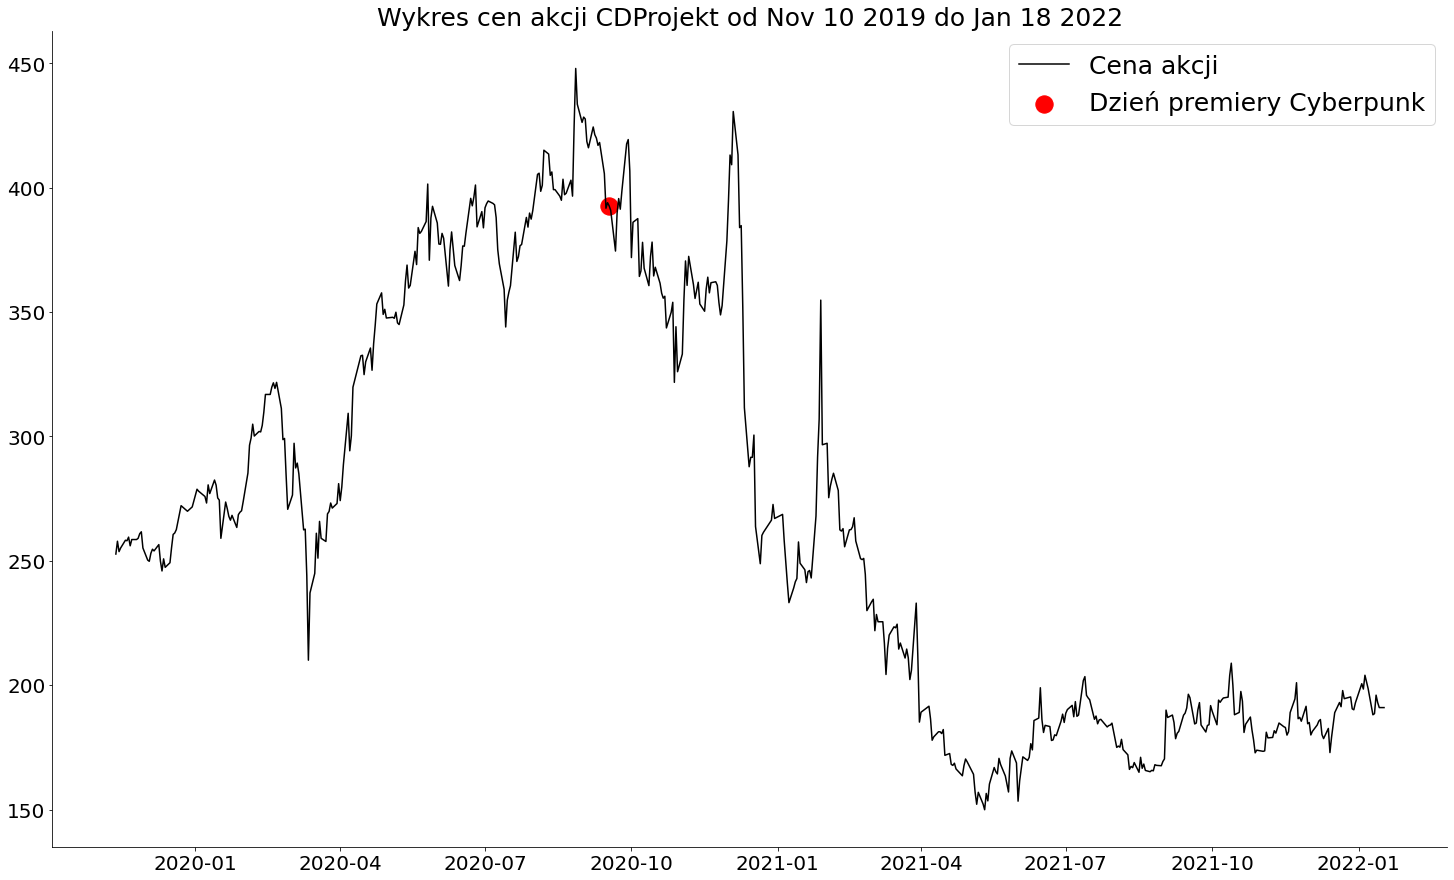

In [4]:
fig, ax = plt.subplots(figsize=(25,15))   
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title("Wykres cen akcji CDProjekt od " + str(date(year=int(year1), month=int(month1), day=int(day1)).strftime("%b %d %Y")) + 
             " " + "do " + str(today.strftime("%b %d %Y")),size=25)
ax.tick_params(axis="y", labelsize=20)
ax.tick_params(axis="x", labelsize=20)
ax.plot_date(x = dane_CD.loc[dane_CD['Zamkniecie'] > 0, "Data"], y = dane_CD.loc[dane_CD['Zamkniecie'] > 0, "Zamkniecie"], 
                   fmt="-", color = "black", label="Cena akcji")


ax.scatter(dane_CD.loc[dane_CD['Data'] == "17/09/2020", "Data"], dane_CD.loc[dane_CD['Data'] == "17/09/2020", "Zamkniecie"] , 
                s=300, color = "red", label = "Dzień premiery Cyberpunk")

if int(year1) >= 2018:
    ax.legend(loc=1, prop={'size': 25})
else:
    ax.legend(loc=2, prop={'size': 25})
plt.savefig('kurs1')

Określenie czy wykres jest długoterminowy czy krótko

In [5]:
d1 = today
d2 = datetime(int(year1), int(month1), int(day1))
delta = d1 - d2
print(delta.days)
if delta.days < 400:
    time = "krotko"
else:
    time = "dlugo"

800


# 1. Wstęgi Boolingera

Tworzenie średniej z ostatnich 20 sesji (SME20)

In [6]:
SME = []                             
for i in range(20, len(dane_CD)):
    k = 0
    for j in range(0, 20):
        k += dane_CD.iat[i - j, 4]

    SME.append(k/20)
SME20 = []
for i in range(0, 20):
    SME20.append(np.nan)
for j in range(20, len(dane_CD)):
    SME20.append(SME[j-20])
dane_CD['SME20'] = SME20

Obliczanie odchylenia standardowego

In [7]:
SD1 = []                            
for i in range(20, len(dane_CD)):
    k = []
    for j in range(0, 20):
        k.append(dane_CD.iat[i - j, 4])
    SD1.append(st.pstdev(k))
SD = []
for i in range(0, 20):
    SD.append(np.nan)
for j in range(20, len(dane_CD)):
    SD.append(SD1[j-20])
dane_CD['SD'] = SD

Tworzenie górnej i dolnej wstęgi Bollingera

In [8]:
dane_CD['SD_gorne'] = dane_CD['SME20'] + 2 * dane_CD['SD']    
dane_CD['SD_dolne'] = dane_CD['SME20'] - 2 * dane_CD['SD']

Sygnały kupna i sprzedaży 

In [9]:
sell_points1 = (dane_CD.loc[dane_CD["SD_gorne"] < dane_CD["Zamkniecie"], "Data"])
buy_points1 = (dane_CD.loc[dane_CD["SD_dolne"] > dane_CD["Zamkniecie"], "Data"])
sell_points1 = sell_points1.to_frame()
buy_points1 = buy_points1.to_frame()

In [10]:
dane_CD

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen,SME20,SD,SD_gorne,SD_dolne
0,2019-11-12,255.34,256.61,249.32,252.72,314092,NaN,NaN,NaN,NaN
1,2019-11-13,252.72,259.33,252.72,257.87,273988,NaN,NaN,NaN,NaN
2,2019-11-14,258.75,258.94,251.36,253.69,261977,NaN,NaN,NaN,NaN
3,2019-11-15,254.08,257.48,253.30,255.15,183698,NaN,NaN,NaN,NaN
4,2019-11-18,257.48,258.26,255.83,258.26,124721,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
540,2022-01-11,189.50,193.10,188.20,188.56,343540,190.499,7.814910,206.128820,174.869180
541,2022-01-12,189.30,196.66,186.00,196.00,523991,191.372,7.394110,206.160219,176.583781
542,2022-01-13,193.00,197.76,192.00,193.02,294449,191.892,7.120981,206.133963,177.650037
543,2022-01-14,192.96,195.34,189.70,191.00,256701,192.796,5.651027,204.098054,181.493946


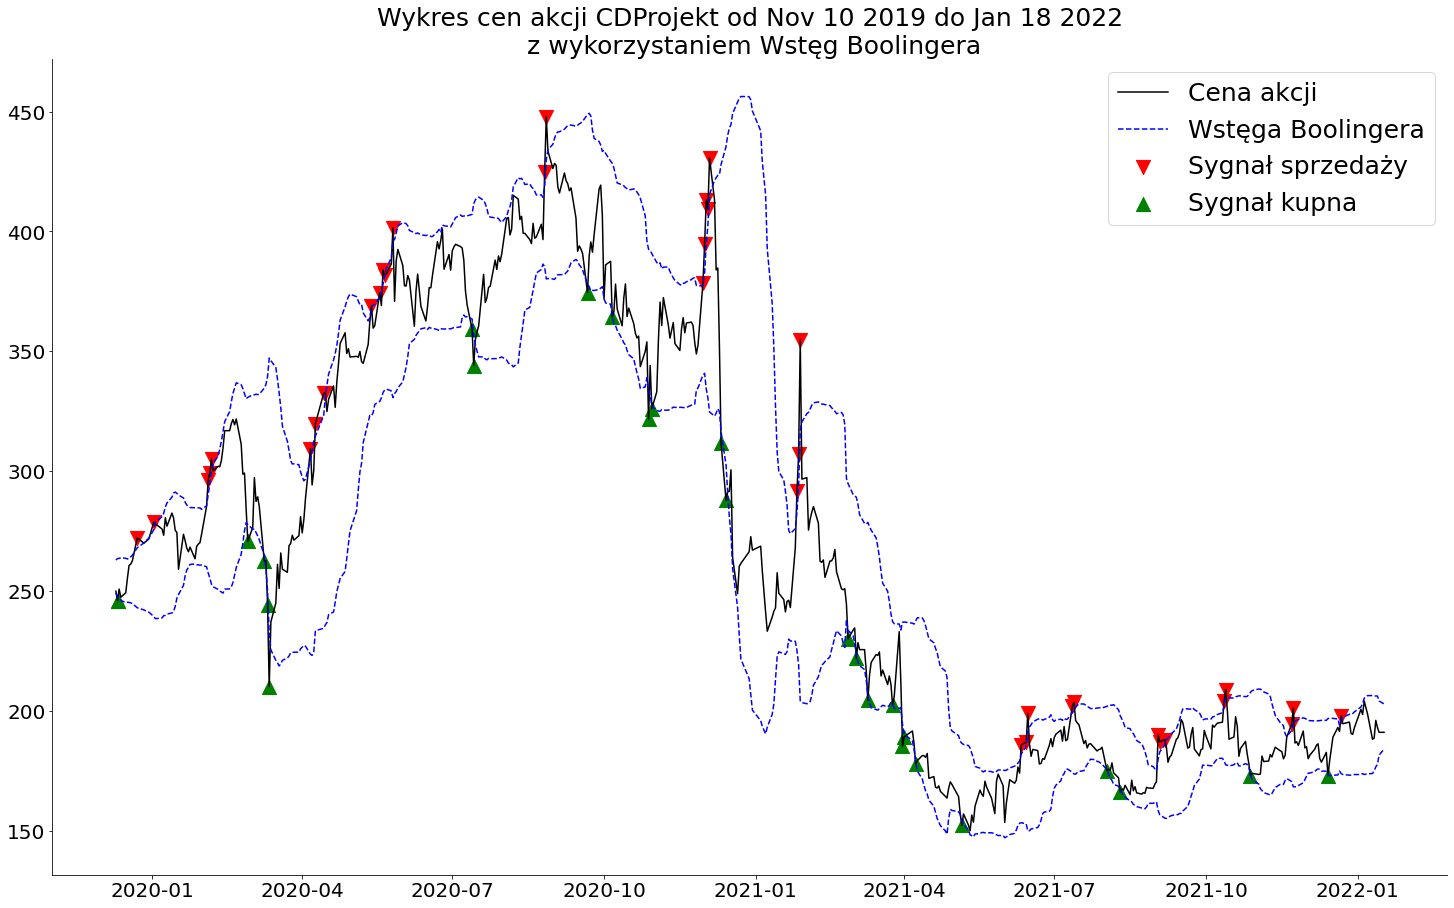

In [11]:
fig, ax = plt.subplots(figsize=(25,15))


ax.plot_date(x = dane_CD.loc[dane_CD['SME20'] > 0, "Data"], y = dane_CD.loc[dane_CD['SME20'] > 0, "Zamkniecie"], 
                   fmt="-", color = "black", label = "Cena akcji")

# górna i dolna wstęga
ax.plot_date(x = dane_CD["Data"], y = dane_CD["SD_gorne"], fmt="-", color = "blue", linestyle = '--', 
             label = "Wstęga Boolingera")
ax.plot_date(x = dane_CD["Data"], y = dane_CD["SD_dolne"], fmt="-", color = "blue", linestyle = '--')


ax.set_title("Wykres cen akcji CDProjekt od " + str(date(year=int(year1), month=int(month1), day=int(day1)).strftime("%b %d %Y")) + 
             " " + "do " + str(today.strftime("%b %d %Y")) + "\n z wykorzystaniem Wstęg Boolingera",size=25)

# Tworzenie punktów sprzedaży na wykresie

ax.scatter(sell_points1.iat[0, 0], dane_CD.loc[dane_CD['Data'] == sell_points1.iat[0, 0], "Zamkniecie"] , 
                marker='v', c='r', s=200, label = "Sygnał sprzedaży")
for i in range(1, len(sell_points1)):
    ax.scatter(sell_points1.iat[i, 0], dane_CD.loc[dane_CD['Data'] == sell_points1.iat[i, 0], "Zamkniecie"] , 
                marker='v', c='r', s=200) 
    
ax.scatter(buy_points1.iat[0, 0], dane_CD.loc[dane_CD['Data'] == buy_points1.iat[0, 0], "Zamkniecie"] , 
                marker='^', c='g', s=200, label = "Sygnał kupna")
for i in range(0, len(buy_points1)):
    ax.scatter(buy_points1.iat[i, 0], dane_CD.loc[dane_CD['Data'] == buy_points1.iat[i, 0], "Zamkniecie"] , 
                marker='^', c='g', s=200)
    
    
ax.tick_params(axis="y", labelsize=20)
ax.tick_params(axis="x", labelsize=20)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend( loc=1, prop={'size': 25})
plt.savefig('kurs wstegi1')

# 2. Zniesienia Fibonacciego

Obliczanie maksymalnego i minimalnej wartości 

In [12]:
dane = dane_CD.loc[dane_CD['SME20'] > 0, "Zamkniecie"]
max = dane.max()
min = dane.min()
max

447.9

Określanie trendu

In [13]:
trend = ""
dane_max = dane_CD.loc[dane_CD['Zamkniecie'] == max]
data_max = dane_max.iat[0, 0]

dane_min = dane_CD.loc[dane_CD['Zamkniecie'] == min]
data_min = dane_min.iat[0, 0]

if data_max > data_min:
    trend = "wzrostowy"
else:
    trend = "spadkowy"

trend

'spadkowy'

Obliczanie konkretnych poziomów

In [14]:
zniesienia1 = [23.6, 38.2, 50.0, 61.8, 78.6]
zniesienia2 = [23.6, 38.2, 50.0, 61.8, 78.6]
if trend == "spadkowy":
    poziomy = []
    poziomy.append((max - (max - min)*0.786))
    poziomy.append((max - (max - min)*0.618))
    poziomy.append((max - (max - min)*0.5))
    poziomy.append((max - (max - min)*0.382))
    poziomy.append((max - (max - min)*0.236))
else: 
    poziomy = []
    poziomy.append((min + (max - min)*0.5))
    poziomy.append((min + (max - min)*0.618))
    poziomy.append((min + (max - min)*0.382))
    poziomy.append((min + (max - min)*0.786))
    poziomy.append((min + (max - min)*0.236))

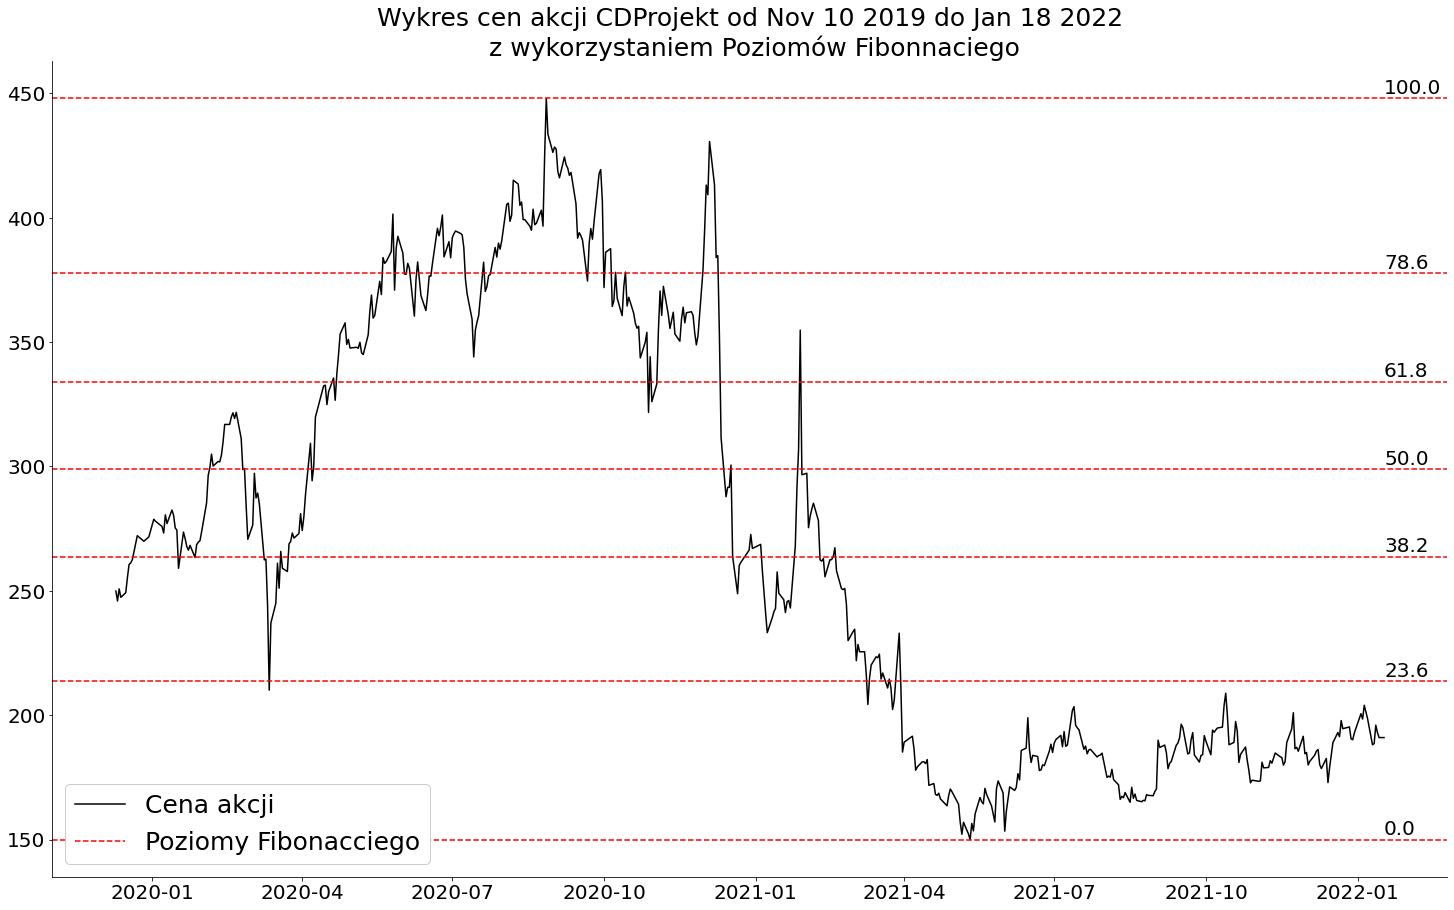

In [15]:
fig, ax = plt.subplots(figsize=(25,15))   

ax.plot_date(x = dane_CD.loc[dane_CD['SME20'] > 0, "Data"], y = dane_CD.loc[dane_CD['SME20'] > 0, "Zamkniecie"], 
                   fmt="-", color = "black", label = "Cena akcji")

ax.axhline(y = max, color = "red", linestyle = '--', label = "Poziomy Fibonacciego")
ax.axhline(y = min, color = "red", linestyle = '--')

if trend == "spadkowy":
    for i in range(0, 5):
        ax.text(dane_CD.iat[len(dane_CD) - 1, 0], poziomy[i] + 2, str(zniesienia1[i]), fontsize=20, color = 'black' )
        
else: 
    for i in range(0, 5):
        ax.text(dane_CD.iat[len(dane_CD) - 1, 0], poziomy[i] + 2, str(zniesienia2[i]), fontsize=20, color = 'black' )

if trend == "wzrostowy":
    ax.text(dane_CD.iat[len(dane_CD) - 1, 0], max + 2, "0.0", fontsize=20, color = 'black')
    ax.text(dane_CD.iat[len(dane_CD) - 1, 0], min + 2, "100.0", fontsize=20, color = 'black')
else:
    ax.text(dane_CD.iat[len(dane_CD) - 1, 0], max + 2, "100.0", fontsize=20, color = 'black')
    ax.text(dane_CD.iat[len(dane_CD) - 1, 0], min + 2, "0.0", fontsize=20, color = 'black')
        
for i in poziomy:
    ax.axhline(y = i, color = "red", linestyle = '--')
    
ax.set_title("Wykres cen akcji CDProjekt od " + str(date(year=int(year1), month=int(month1), day=int(day1)).strftime("%b %d %Y")) + 
             " " + "do " + str(today.strftime("%b %d %Y")) + "\n z wykorzystaniem Poziomów Fibonnaciego",size=25)
    
ax.tick_params(axis="y", labelsize=20)
ax.tick_params(axis="x", labelsize=20)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


if trend == "wzrostowy":
    ax.legend(loc = 2, prop={'size': 25}, framealpha = 1)
else:
    ax.legend(loc = 3, prop={'size': 25}, framealpha = 1)
    
plt.savefig('kurs Fibo')

# 3. Oscylator MACD

#### Obliczanie wykładniczej średniej kroczącej

Dla 12 ostatnich okresów

In [16]:
EMA1 = []                             
for i in range(26, len(dane_CD)):
    k = 0
    z = 0
    for j in range(0, 12):
        k += ((1-(2/13))**j)*(dane_CD.iat[i - j, 4])
        z += ((1-(2/13))**j)
    EMA1.append(k/z)
    
EMA12 = []
for i in range(0, 26):
    EMA12.append(np.nan)
for j in range(26, len(dane_CD)):
    EMA12.append(EMA1[j-26])
dane_CD['EMA12'] = EMA12

Dla 26 ostatnich okresów

In [17]:
EMA2 = []                             
for i in range(26, len(dane_CD)):
    k = 0
    z = 0
    for j in range(0, 26):
        k += ((1-(2/13))**j)*(dane_CD.iat[i - j, 4])
        z += ((1-(2/13))**j)
    EMA2.append(k/z)
    
EMA26 = []
for i in range(0, 26):
    EMA26.append(np.nan)
for j in range(26, len(dane_CD)):
    EMA26.append(EMA2[j-26])
dane_CD['EMA26'] = EMA26

Tworzenie wartości MACD

In [18]:
dane_CD['MACD'] = dane_CD['EMA12'] - dane_CD['EMA26'] 

In [19]:
dane_CD

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen,SME20,SD,SD_gorne,SD_dolne,EMA12,EMA26,MACD
0,2019-11-12,255.34,256.61,249.32,252.72,314092,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-11-13,252.72,259.33,252.72,257.87,273988,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-11-14,258.75,258.94,251.36,253.69,261977,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-11-15,254.08,257.48,253.30,255.15,183698,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-11-18,257.48,258.26,255.83,258.26,124721,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,2022-01-11,189.50,193.10,188.20,188.56,343540,190.499,7.814910,206.128820,174.869180,194.457614,193.334702,1.122912
541,2022-01-12,189.30,196.66,186.00,196.00,523991,191.372,7.394110,206.160219,176.583781,194.650835,193.777149,0.873686
542,2022-01-13,193.00,197.76,192.00,193.02,294449,191.892,7.120981,206.133963,177.650037,194.362575,193.684075,0.678499
543,2022-01-14,192.96,195.34,189.70,191.00,256701,192.796,5.651027,204.098054,181.493946,193.742747,193.285316,0.457431


Linia signal

In [20]:
SIG = []                             
for i in range(35, len(dane_CD)):
    k = 0
    z = 0
    for j in range(0, 9):
        k += ((1-(2/10))**j)*(dane_CD.iat[i - j, 12])
        z += ((1-(2/10))**j)
    SIG.append(k/z)
    
SIGNAL = []
for i in range(0, 35):
    SIGNAL.append(np.nan)
for j in range(35, len(dane_CD)):
    SIGNAL.append(SIG[j-35])
dane_CD['SIGNAL'] = SIGNAL

In [21]:
dane_CD

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen,SME20,SD,SD_gorne,SD_dolne,EMA12,EMA26,MACD,SIGNAL
0,2019-11-12,255.34,256.61,249.32,252.72,314092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-11-13,252.72,259.33,252.72,257.87,273988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-11-14,258.75,258.94,251.36,253.69,261977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-11-15,254.08,257.48,253.30,255.15,183698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-11-18,257.48,258.26,255.83,258.26,124721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,2022-01-11,189.50,193.10,188.20,188.56,343540,190.499,7.814910,206.128820,174.869180,194.457614,193.334702,1.122912,1.424792
541,2022-01-12,189.30,196.66,186.00,196.00,523991,191.372,7.394110,206.160219,176.583781,194.650835,193.777149,0.873686,1.318992
542,2022-01-13,193.00,197.76,192.00,193.02,294449,191.892,7.120981,206.133963,177.650037,194.362575,193.684075,0.678499,1.183878
543,2022-01-14,192.96,195.34,189.70,191.00,256701,192.796,5.651027,204.098054,181.493946,193.742747,193.285316,0.457431,1.020892


Funkcja znajdująca punkty sprzedaży i kupna

In [22]:
def buysell(dane_CD):
    buy = []
    sell= []
    flag = -1
        
        
    for i in range(0,len(dane_CD)):
        if (dane_CD['MACD'][i] > dane_CD['SIGNAL'][i]):      
            sell.append(np.nan)
            if flag!=1:
             buy.append(dane_CD["Zamkniecie"][i])
             flag=1
            else:
             buy.append(np.nan)
        elif (dane_CD['MACD'][i] < dane_CD['SIGNAL'][i]):      
            buy.append(np.nan)
            if flag!=0:
              sell.append(dane_CD["Zamkniecie"][i])
              flag=0
            else:
              sell.append(np.nan)
        else:
          buy.append(np.nan)
          sell.append(np.nan)   
    return (buy,sell)  

In [23]:
Sygnał=buysell(dane_CD)
dane_CD["buysignal"]=Sygnał[0]
dane_CD["sellsignal"]=Sygnał[1]

In [24]:
dane_CD

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen,SME20,SD,SD_gorne,SD_dolne,EMA12,EMA26,MACD,SIGNAL,buysignal,sellsignal
0,2019-11-12,255.34,256.61,249.32,252.72,314092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-11-13,252.72,259.33,252.72,257.87,273988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-11-14,258.75,258.94,251.36,253.69,261977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-11-15,254.08,257.48,253.30,255.15,183698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-11-18,257.48,258.26,255.83,258.26,124721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,2022-01-11,189.50,193.10,188.20,188.56,343540,190.499,7.814910,206.128820,174.869180,194.457614,193.334702,1.122912,1.424792,NaN,NaN
541,2022-01-12,189.30,196.66,186.00,196.00,523991,191.372,7.394110,206.160219,176.583781,194.650835,193.777149,0.873686,1.318992,NaN,NaN
542,2022-01-13,193.00,197.76,192.00,193.02,294449,191.892,7.120981,206.133963,177.650037,194.362575,193.684075,0.678499,1.183878,NaN,NaN
543,2022-01-14,192.96,195.34,189.70,191.00,256701,192.796,5.651027,204.098054,181.493946,193.742747,193.285316,0.457431,1.020892,NaN,NaN


In [25]:
sell_points2 = (dane_CD.loc[dane_CD['sellsignal'] > 0, "Data"])
buy_points2 = (dane_CD.loc[dane_CD['buysignal'] > 0, "Data"])
sell_points2 = sell_points2.to_frame()
buy_points2 = buy_points2.to_frame()

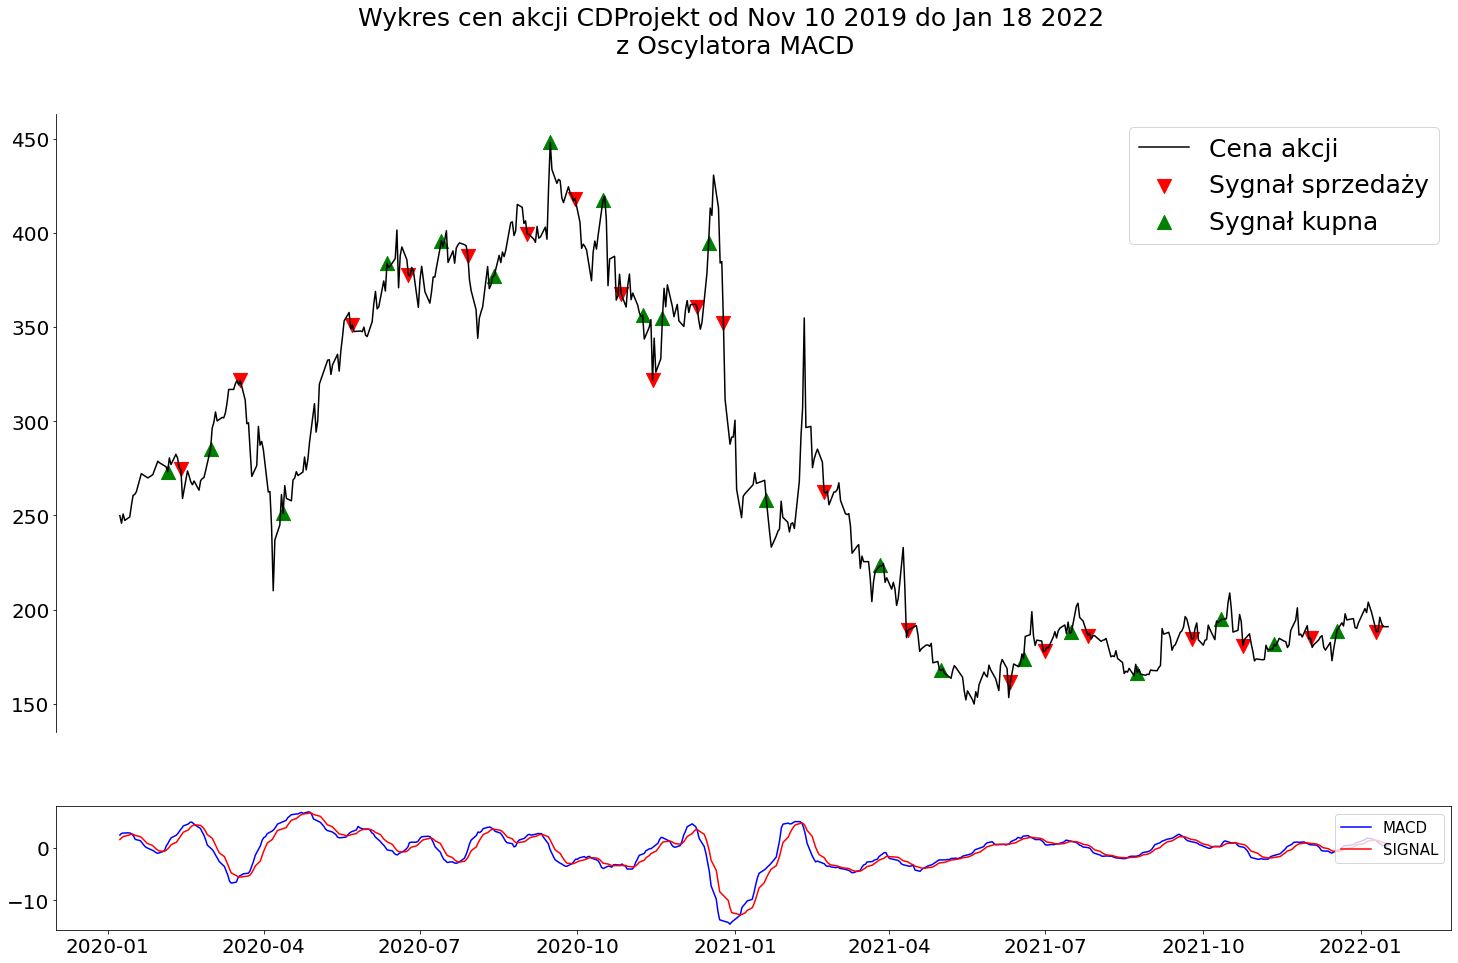

In [26]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(25,15), gridspec_kw={'height_ratios': [5, 1]} )   


fig.suptitle("Wykres cen akcji CDProjekt od " + str(date(year=int(year1), month=int(month1), day=int(day1)).strftime("%b %d %Y")) + 
             " " + "do " + str(today.strftime("%b %d %Y")) + "\n z Oscylatora MACD",size=25)

ax1.plot_date(x = dane_CD.loc[dane_CD['SME20'] > 0, "Data"], y = dane_CD.loc[dane_CD['SME20'] > 0, "Zamkniecie"], 
                   fmt="-", color = "black",label = "Cena akcji")
#ax1.plot_date(x = dane_CD["Data"], y = dane_CD["EMA26"], fmt="-", color = "blue",label = "EMA26")
#ax1.plot_date(x = dane_CD["Data"], y = dane_CD["EMA12"], fmt="-", color = "green",label = "EMA12")

# Tworzenie punktów sprzedaży na wykresie
ax1.scatter(sell_points2.iat[0, 0], dane_CD.loc[dane_CD['Data'] == sell_points2.iat[0, 0], "Zamkniecie"] , 
                marker='v',c='r',s=200, label = "Sygnał sprzedaży")

for i in range(1, len(sell_points2)):
    ax1.scatter(sell_points2.iat[i, 0], dane_CD.loc[dane_CD['Data'] == sell_points2.iat[i, 0], "Zamkniecie"] , 
                marker='v', c='r', s=200)   
ax1.scatter(buy_points2.iat[0, 0], dane_CD.loc[dane_CD['Data'] == buy_points2.iat[0, 0], "Zamkniecie"] , 
                marker='^', c='g', s=200, label = "Sygnał kupna")
for i in range(1, len(buy_points2)):
    ax1.scatter(buy_points2.iat[i, 0], dane_CD.loc[dane_CD['Data'] == buy_points2.iat[i, 0], "Zamkniecie"] , 
                marker='^',c='g',s=200)

ax1.tick_params(axis="y", labelsize=20)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.tick_params(axis='x', bottom=False,labelbottom=False,)

ax1.legend( loc=1, prop={'size': 25})

ax2.plot_date(x = dane_CD.loc[dane_CD['SIGNAL'] >= dane_CD["SIGNAL"].min(), "Data"], 
              y = dane_CD.loc[dane_CD['SIGNAL'] >= dane_CD["SIGNAL"].min(), "MACD"], 
                   fmt="-", color = "blue",label="MACD")

ax2.plot_date(x = dane_CD.loc[dane_CD['SIGNAL'] >=  dane_CD["SIGNAL"].min(), "Data"], 
              y = dane_CD.loc[dane_CD['SIGNAL']  >= dane_CD["SIGNAL"].min(), "SIGNAL"], 
                   fmt="-", color = "red",label="SIGNAL")
ax2.tick_params(axis="y", labelsize=20)
ax2.tick_params(axis="x", labelsize=20)
ax2.legend( loc=1, prop={'size': 15})
plt.savefig('kurs macd')

# 4. Oscylator RSI 

In [27]:
R = []
for i in range(0, len(dane_CD)):
    R.append((dane_CD.iat[i, 4]) - (dane_CD.iat[i - 1, 4]))

Tworzenie średniej z ostatnich 20 sesji (SME20)

In [28]:
RS = []                             
for i in range(14, len(dane_CD)):
    wzrost = []
    spadek = []
    for j in range(0, 13):
        if R[i - j] > 0:
            wzrost.append(R[i - j])
        else:
            spadek.append(R[i - j])

    RS.append(-((sum(wzrost)/(len(wzrost)))/(sum(spadek)/len(spadek))))

RS1 = []
for i in range(0, 14):
    RS1.append(np.nan)
for j in range(14, len(dane_CD)):
    RS1.append(RS[j-14])
dane_CD['RS1'] = RS1

In [29]:
dane_CD['RSI'] = np.nan
for j in range(14, len(dane_CD)):
    dane_CD['RSI'] = 100 - (100 / (1 + dane_CD['RS1'] ))

In [30]:
dane_CD

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen,SME20,SD,SD_gorne,SD_dolne,EMA12,EMA26,MACD,SIGNAL,buysignal,sellsignal,RS1,RSI
0,2019-11-12,255.34,256.61,249.32,252.72,314092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-11-13,252.72,259.33,252.72,257.87,273988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-11-14,258.75,258.94,251.36,253.69,261977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-11-15,254.08,257.48,253.30,255.15,183698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-11-18,257.48,258.26,255.83,258.26,124721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,2022-01-11,189.50,193.10,188.20,188.56,343540,190.499,7.814910,206.128820,174.869180,194.457614,193.334702,1.122912,1.424792,NaN,NaN,0.980929,49.518627
541,2022-01-12,189.30,196.66,186.00,196.00,523991,191.372,7.394110,206.160219,176.583781,194.650835,193.777149,0.873686,1.318992,NaN,NaN,1.007451,50.185574
542,2022-01-13,193.00,197.76,192.00,193.02,294449,191.892,7.120981,206.133963,177.650037,194.362575,193.684075,0.678499,1.183878,NaN,NaN,0.975657,49.383919
543,2022-01-14,192.96,195.34,189.70,191.00,256701,192.796,5.651027,204.098054,181.493946,193.742747,193.285316,0.457431,1.020892,NaN,NaN,1.018558,50.459683


Tworzenie punktów sprzedaży i kupna 

In [31]:
sell_points = (dane_CD.loc[dane_CD['RSI'] > 70, "Data"])
buy_points = (dane_CD.loc[dane_CD['RSI'] < 30, "Data"])
sell_points = sell_points.to_frame()
buy_points = buy_points.to_frame()

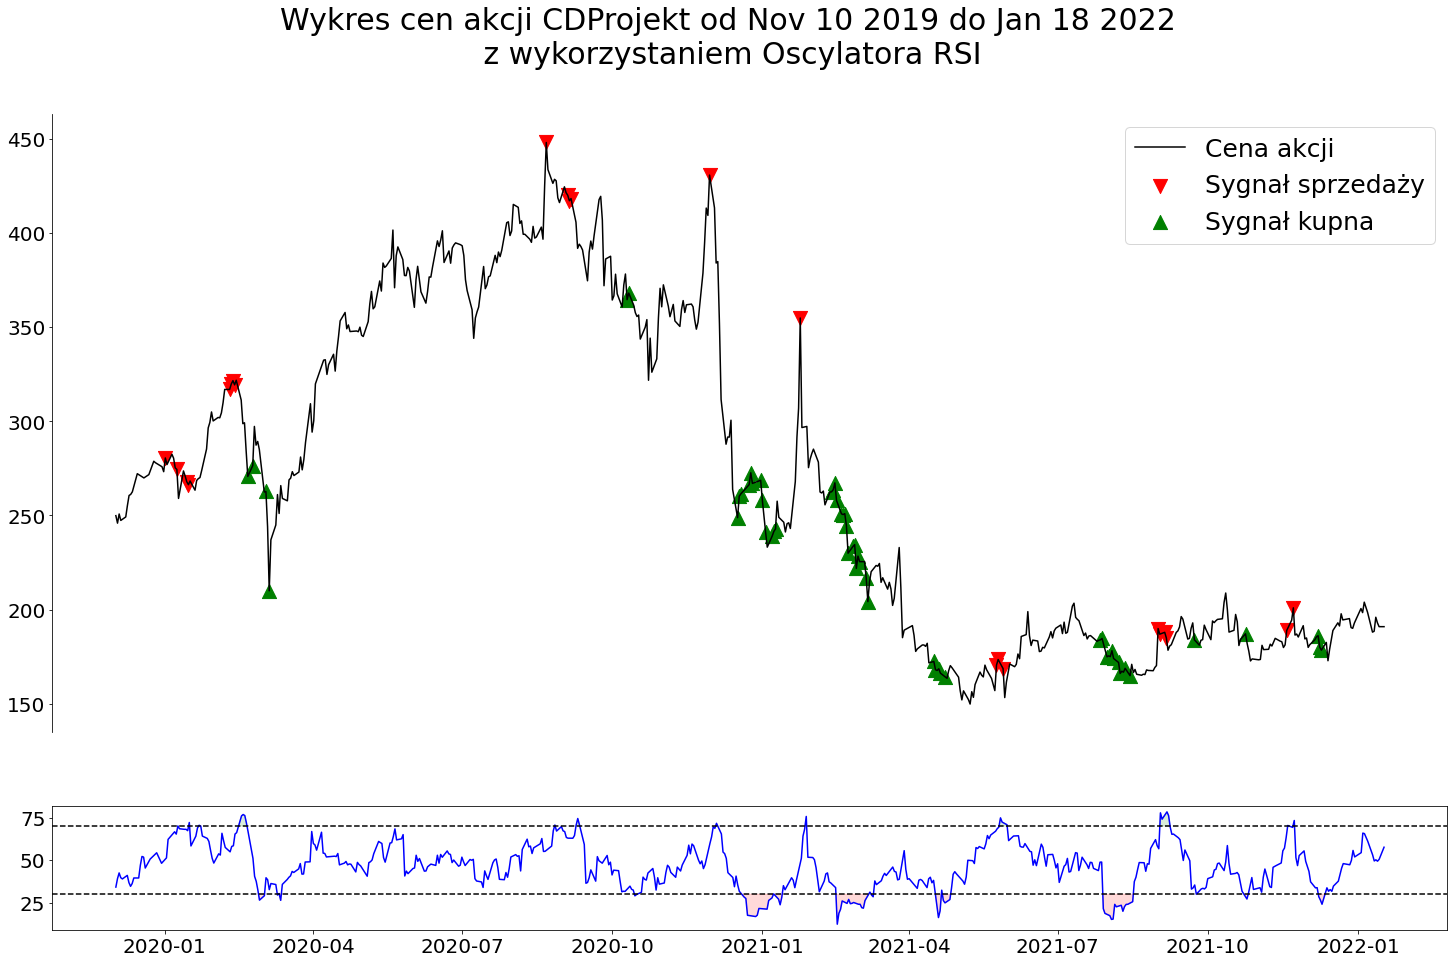

In [32]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(25,15), gridspec_kw={'height_ratios': [5, 1]} )   


ax1.plot_date(x = dane_CD.loc[dane_CD['SME20'] > 0, "Data"], y = dane_CD.loc[dane_CD['SME20'] > 0, "Zamkniecie"], 
                   fmt="-", color = "black", label = "Cena akcji")

fig.suptitle("Wykres cen akcji CDProjekt od " + str(date(year=int(year1), month=int(month1), day=int(day1)).strftime("%b %d %Y")) + 
             " " + "do " + str(today.strftime("%b %d %Y")) + "\n z wykorzystaniem Oscylatora RSI", size=30)

ax1.tick_params(axis="y", labelsize=20)

# Tworzenie punktów sprzedaży na wykresie
ax1.scatter(sell_points.iat[0, 0], dane_CD.loc[dane_CD['Data'] == sell_points.iat[0, 0], "Zamkniecie"] , 
                marker='v',c='r',s=200, label = "Sygnał sprzedaży")

for i in range(1, len(sell_points)):
    ax1.scatter(sell_points.iat[i, 0], dane_CD.loc[dane_CD['Data'] == sell_points.iat[i, 0], "Zamkniecie"] , 
                marker='v', c='r', s=200)    
ax1.scatter(buy_points.iat[0, 0], dane_CD.loc[dane_CD['Data'] == buy_points.iat[0, 0], "Zamkniecie"] , 
                marker='^', c='g', s=200, label = "Sygnał kupna")
for i in range(1, len(buy_points)):
    ax1.scatter(buy_points.iat[i, 0], dane_CD.loc[dane_CD['Data'] == buy_points.iat[i, 0], "Zamkniecie"] , 
                marker='^',c='g',s=200)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.tick_params(axis='x', bottom=False,labelbottom=False,)

ax1.legend( loc=1, prop={'size': 25})

ax2.plot_date(x = dane_CD.loc[dane_CD['RSI'] > 0, "Data"], y = dane_CD.loc[dane_CD['RSI'] > 0, "RSI"], 
                   fmt="-", color = "blue")
ax2.axhline(y = 70, color = "black", linestyle = '--')
ax2.axhline(y = 30, color = "black", linestyle = '--')

ax2.fill_between(dane_CD['Data'], dane_CD['RSI'], 30, 
                 where = (dane_CD['RSI'] < 30),
                interpolate = True, color = "red", alpha = 0.15)

ax2.fill_between(dane_CD['Data'], dane_CD['RSI'], 70, 
                 where = (dane_CD['RSI'] > 70),
                interpolate = True, color = "green", alpha = 0.15)
ax2.tick_params(axis="y", labelsize=20)
ax2.tick_params(axis="x", labelsize=20)
plt.savefig('kurs RSI1')